In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import yfinance as yf
import datetime as dt
from datetime import date , timedelta
import plotly.graph_objects as go
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
df = pd.read_csv("AAPL_stock_data.csv")
df.head()

,Date,Close,High,Low,Open,Volume
0,02-11-2021,147.225189,148.746316,145.880702,145.890525,69122000
1,03-11-2021,148.667801,149.138855,147.028914,147.588288,54511500
2,04-11-2021,148.147675,149.590275,147.833629,148.756119,60394600
3,05-11-2021,148.678406,149.582583,147.479385,149.277916,65463900
4,08-11-2021,147.852829,148.963401,147.577645,148.806149,55020900


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    754 non-null    object 
 1   Close   754 non-null    float64
 2   High    754 non-null    float64
 3   Low     754 non-null    float64
 4   Open    754 non-null    float64
 5   Volume  754 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 35.5+ KB


In [ ]:
df = df[['Date', 'Close']]
df.head()

,Date,Close
0,02-11-2021,147.225189
1,03-11-2021,148.667801
2,04-11-2021,148.147675
3,05-11-2021,148.678406
4,08-11-2021,147.852829


ADF test

In [ ]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(df):
    result = adfuller(df)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] <= 0.05:
        print("Reject the null hypothesis. Data is stationary")
    else:
        print("Fail to reject the null hypothesis.Data is not stationary")


check_stationarity(df['Close'])

ADF Statistic: -0.999844
p-value: 0.753321
Fail to reject the null hypothesis.Data is not stationary


Decomposing

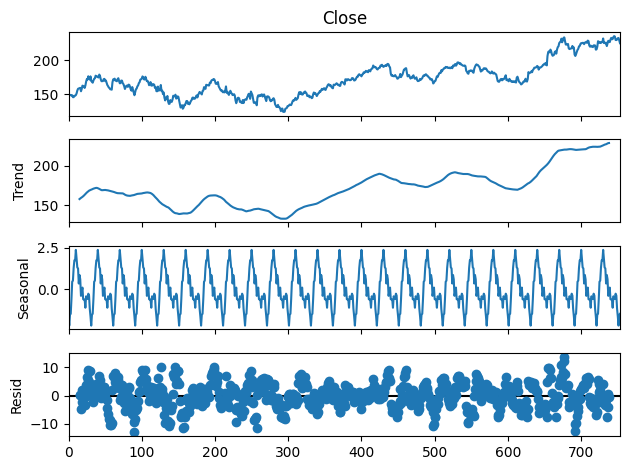

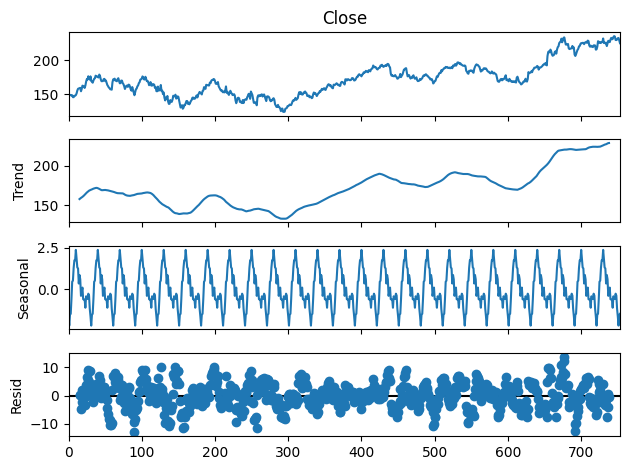

In [ ]:

from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df['Close'], model='additive', period=30)
decompose.plot()


defferencing

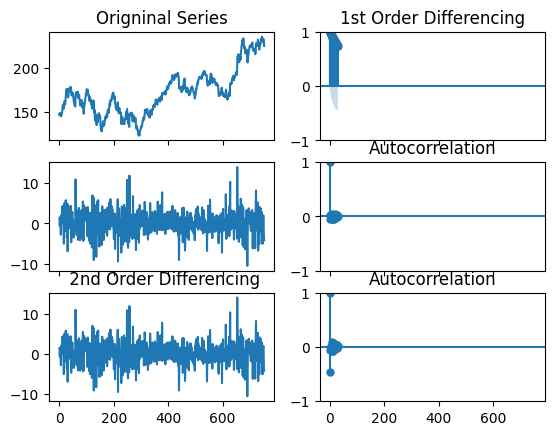

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plot


fig, axes = plt.subplots(3, 2 , sharex=True)
axes[0,0].plot(df['Close']); axes[0, 0].set_title('Origninal Series')
plot_acf(df['Close'], ax=axes[0, 1])


axes[1, 0].plot(df['Close'].diff()); axes[0, 1].set_title('1st Order Differencing')
plot_acf(df['Close'].diff().dropna(), ax=axes[1, 1])


axes[2,0].plot(df['Close'].diff()); axes[2, 0].set_title(' 2nd Order Differencing')
plot_acf(df['Close'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

ACF q value

           0
0   1.000000
1   0.990341
2   0.979987
3   0.969895
4   0.960094
5   0.950263
6   0.940355
7   0.930279
8   0.919575
9   0.909455
10  0.899008
11  0.889375
12  0.879577
13  0.870280
14  0.860943
15  0.852215
16  0.843636
17  0.835503
18  0.827756
19  0.819971
20  0.811568
21  0.803064
22  0.794377
23  0.785564
24  0.775835
25  0.766868
26  0.758219
27  0.749770
28  0.741045


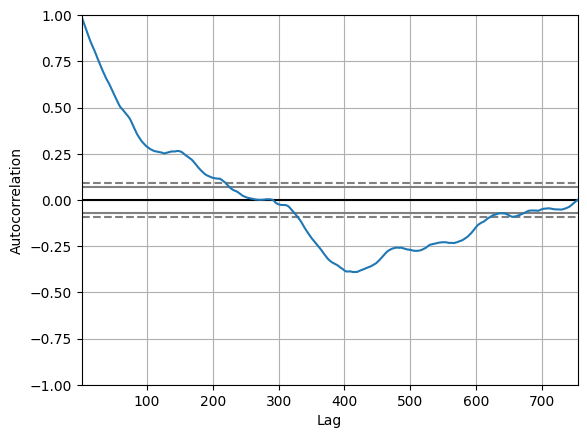

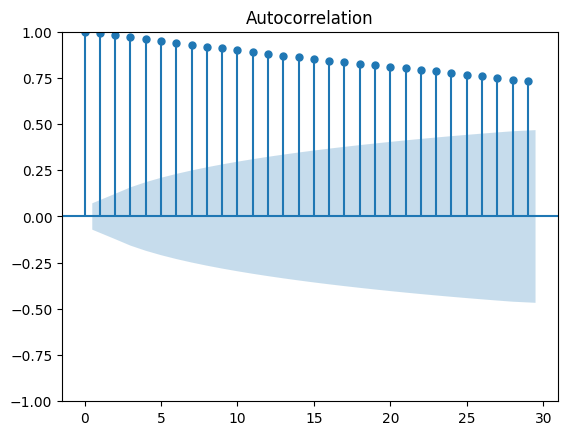

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pd.plotting.autocorrelation_plot(df['Close'])

plot_acf(df['Close'], alpha=0.05)

from statsmodels.tsa.stattools import acf , pacf
x_acf = pd.DataFrame(acf(df['Close']))
print(x_acf)

PACF = p value

<Figure size 800x500 with 0 Axes>

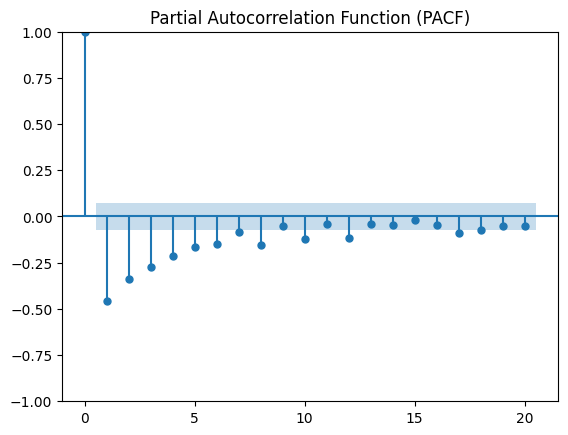

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 5))
plot_pacf(df['Close'].diff().diff().dropna(), lags=20, alpha=0.05)
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()


In [ ]:


p = 2

d = 2

q = 6

In [ ]:
pip  install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 30.6 MB/s eta 0:00:00


Fit the Arima model


In [ ]:
from pmdarima.arima import auto_arima


model = auto_arima(df['Close'],
                   start_p=2,
                   start_q=2,
                   max_p=6,
                   max_q=6,
                   m=1,
                   start_P=0,
                   seasonal=True,
                   d=2,
                   D=2,
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True)



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=5.55 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=4222.034, Time=0.08 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=4046.006, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=1.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,0)(0,0,0)[0]             : AIC=3955.272, Time=1.52 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,2,0)(0,0,0)[0]             : AIC=3897.931, Time=1.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,2,0)(0,0,0)[0]             : AIC=3864.554, Time=1.00 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,2,0)(0,0,0)[0]             : AIC=3845.313, Time=0.67 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(6,2,0)(0,0,0)[0]             : AIC=3830.124, Time=0.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(6,2,1)(0,0,0)[0]             : AIC=inf, Time=8.39 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=3.95 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(6,2,0)(0,0,0)[0] intercept   : AIC=3832.118, Time=1.41 sec

Best model:  ARIMA(6,2,0)(0,0,0)[0]          
Total fit time: 25.306 seconds


In [ ]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  754
Model:               SARIMAX(6, 2, 0)   Log Likelihood               -1908.062
Date:                Thu, 06 Mar 2025   AIC                           3830.124
Time:                        01:11:37   BIC                           3862.484
Sample:                             0   HQIC                          3842.591
                                - 754                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8305      0.035    -24.048      0.000      -0.898      -0.763
ar.L2         -0.7447      0.044    -16.790      0.000      -0.832      -0.658
ar.L3         -0.6130      0.049    -12.520      0.0

In [ ]:
model = auto_arima(df['Close'], seasonal=True, suppress_warnings=True)
print(model.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  754
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1861.954
Date:                Thu, 06 Mar 2025   AIC                           3725.907
Time:                        01:11:38   BIC                           3730.531
Sample:                             0   HQIC                          3727.688
                                - 754                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         8.2280      0.306     26.920      0.000       7.629       8.827
Ljung-Box (L1) (Q):                   0.47   Jarque-Bera (JB):               107.36
Prob(Q):                              0.49   Pr

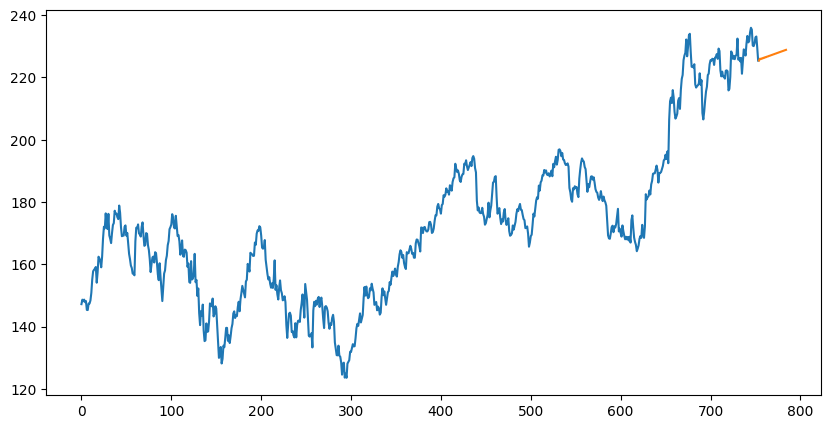

In [ ]:

from statsmodels.tsa.arima.model import ARIMA
p, d, q =2,2,6

model = ARIMA(df['Close'], order=(p, d, q))
model= model.fit()
#print(model.summary())



forecast = model.predict(len(df["Close"]), len(df['Close'])+30)
#print(forecast)


plt.figure(figsize=(10,5))
plt.plot(df['Close'], label='Actual')
plt.plot(forecast, label='Forecast')

Sarima

In [ ]:

import statsmodels.api as sm
import warnings

p, d, q = 2,2,2

model = sm.tsa.statespace.SARIMAX(df['Close'],
                                  order= (p,d,q),
                                  seasonal_order=(p,d,q, 30))
model = model.fit()
print(model.summary())

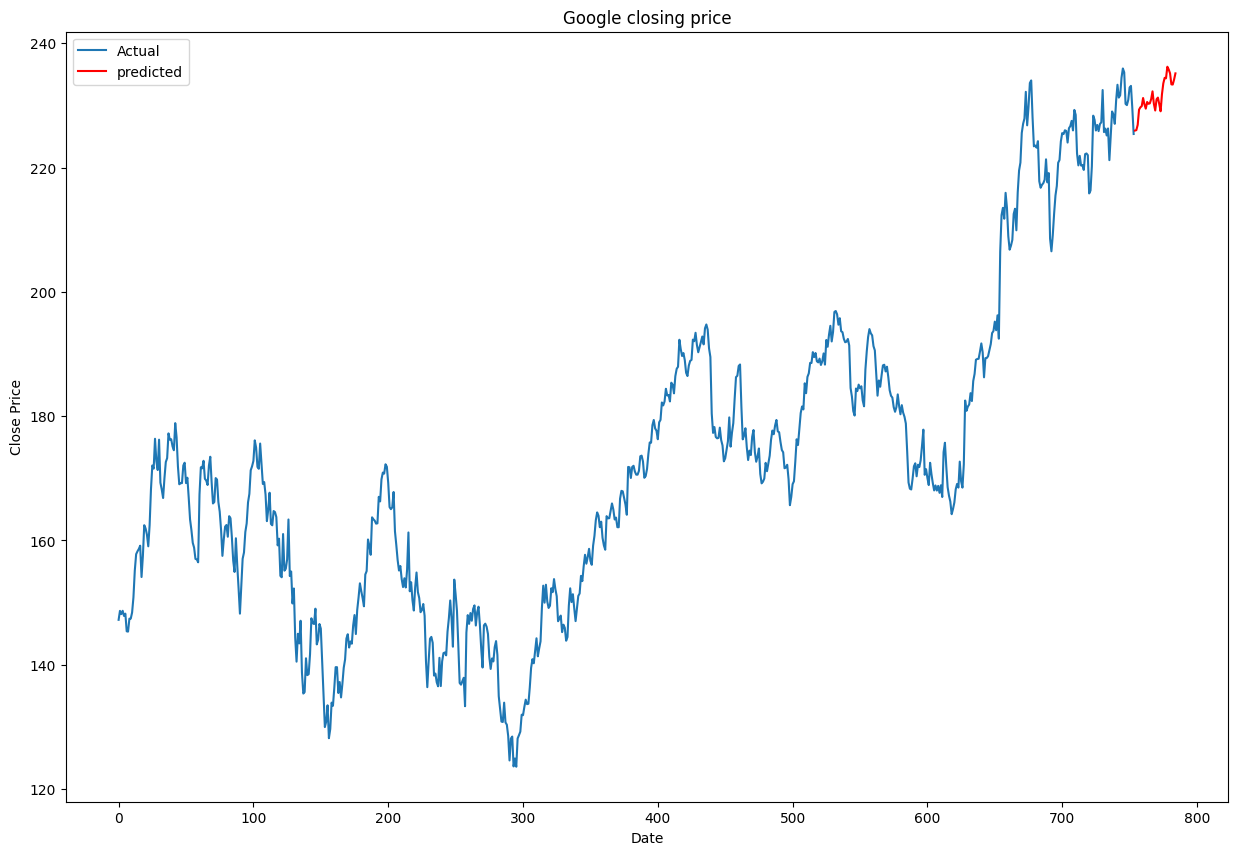

In [ ]:
prediction= model.predict(start=len(df['Close']), end=len(df['Close'])+30)


plt.figure(figsize=(15,10))
plt.plot(df["Close"], label='Actual')
plt.plot(prediction, color='red' , label='predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title'Google closing price'


plt.legend(loc='upper left')
plt.show()

In [ ]:
df.tail()

,Date,Close
749,25-10-2024,230.901810
750,28-10-2024,232.887436
751,29-10-2024,233.156845
752,30-10-2024,229.594696
753,31-10-2024,225.413895


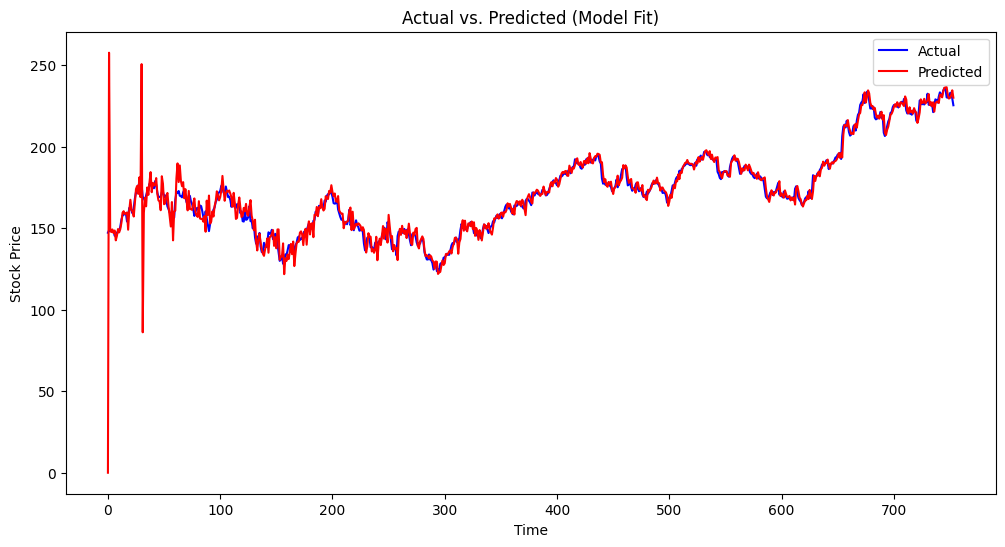

In [ ]:
# Get in-sample predictions
df['Predicted'] = model.fittedvalues

# Plot actual vs. predicted values
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Actual', color='blue')
plt.plot(df['Predicted'], label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted (Model Fit)')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import r2_score


actual_values = df['Close']
predicted_values = model.fittedvalues

r2 = r2_score(actual_values, predicted_values)
print(f'R-squared: {r2:.2%}')


R-squared: 88.32%


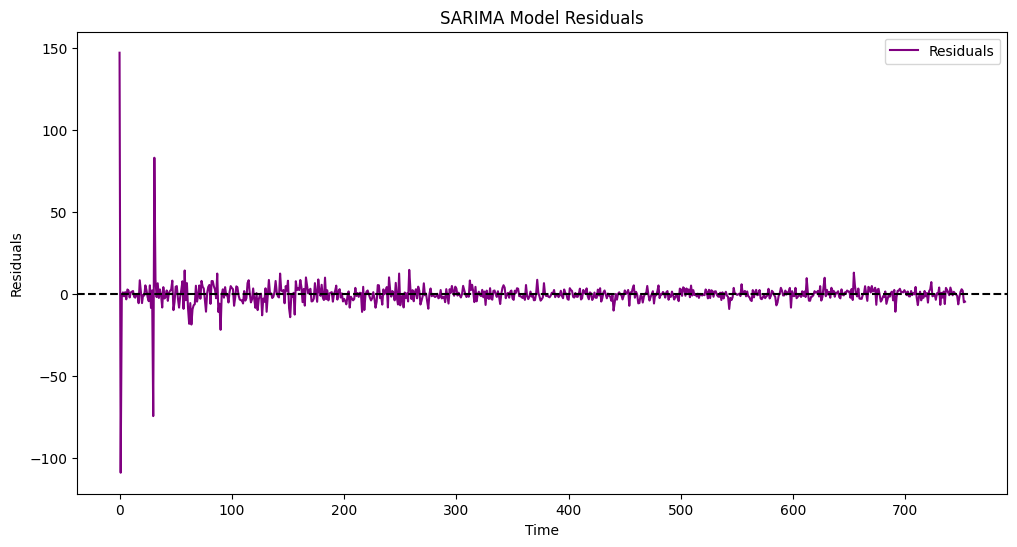

count    754.000000
mean      -0.201178
std        8.791200
min     -108.975465
25%       -2.344771
50%       -0.271998
75%        2.000060
max      147.225189
dtype: float64


In [ ]:
import matplotlib.pyplot as plt


residuals = model.resid


plt.figure(figsize=(12, 6))
plt.plot(residuals, label="Residuals", color="purple")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.title("SARIMA Model Residuals")
plt.legend()
plt.show()


print(residuals.describe())


In [ ]:
import pandas as pd


residuals = model.resid

e
residuals_df = pd.DataFrame(residuals, columns=['Residuals'])


residuals_df.to_csv('residuals.csv', index=True)

print("Residuals saved to residuals.csv")


Residuals saved to residuals.csv


In [ ]:
print(residuals.head())

0    147.225189
1   -108.975465
2     -1.964536
3      1.050768
4     -1.356598
dtype: float64
